# Data Cleanup of Heart Disease Dataset

---

This Jupyter Notebook was created for the **CardioVision** project by *ClinData Solutions*.

### Prerequisite
The original raw data needs to be combined into a single CSV file, including the fixed Cleveland data.

### Objectives
This Jupyter Notebook focuses on:
- Preparing raw data for the **Exploratory Data Analysis (EDA)**
- Preparing raw data for **predictive machine learning**

---

### Acknowledgements
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigators responsible for the data collection at each institution:

1. **Hungarian Institute of Cardiology, Budapest:** *Andras Janosi, M.D.*
2. **University Hospital, Zurich, Switzerland:** *William Steinbrunn, M.D.*
3. **University Hospital, Basel, Switzerland:** *Matthias Pfisterer, M.D.*
4. **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:** *Robert Detrano, M.D., Ph.D.*

### Original Publication
The first publication that used this dataset is:

*Detrano R, Janosi A, Steinbrunn W, Pfisterer M, Schmid JJ, Sandhu S, et al. International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology. 1989; 64(5):304–10.*

---

# Table of contents

Following parts are covered in this Jupyter Notebook:
1. Importing the raw data csv
2. Selecting relevant features based on Expert opinion
3. Handling Feature Categories
4. Handling Null-Values and Duplicates

## 0. Preparations

Load all needed libraries used in this Jupyter Notebook.

In [3]:
# Libraries for data handling and manipulation
import pandas as pd
import numpy as np

# Libraries / Modules for Imputation of missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Libraries / Modules to visualize data
import matplotlib.pyplot as plt

## 1. Importing the raw data csv

In [4]:
# Load the "selected_raw_data.csv" and save it into a dataframe
selected_raw_data_df = pd.read_csv("selected_raw_data.csv")

# Show the dataframe
selected_raw_data_df

,Dataset,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,Cleveland,1,0,63,1,-9,-9,-9,-9,1,...,1,1,1,1,1,1,1,-9.00,-9.0,name
1,Cleveland,2,0,67,1,-9,-9,-9,-9,4,...,1,1,1,1,1,1,1,-9.00,-9.0,name
2,Cleveland,3,0,67,1,-9,-9,-9,-9,4,...,2,2,1,1,1,7,3,-9.00,-9.0,name
3,Cleveland,4,0,37,1,-9,-9,-9,-9,3,...,1,1,1,1,1,1,1,-9.00,-9.0,name
4,Cleveland,6,0,41,0,-9,-9,-9,-9,2,...,1,1,1,1,1,1,1,-9.00,-9.0,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Long Beach VA,200,0,54,0,1,1,1,-9,4,...,1,1,1,1,1,1,1,0.76,5.6,name
478,Long Beach VA,201,0,62,1,0,0,0,-9,1,...,1,1,1,1,1,1,2,0.62,3.5,name
479,Long Beach VA,202,0,55,1,1,1,1,-9,4,...,2,1,1,1,1,1,1,0.69,5.6,name
480,Long Beach VA,116,0,58,1,1,1,1,-9,4,...,1,1,1,1,1,1,1,0.81,6.0,name


## 2. Selection of Chosen Variables

The original dataset contains 76 features, but only 14 have been widely used in publications so far. Some features describe others; for instance, the boolean "hypertension" feature indicates whether the resting blood pressure value is above or below a certain threshold.

All 14 commonly used features were also identified by our domain expert as they are known risk factors for heart disease. In addition, 4 more features were selected for inclusion in the initial Exploratory Data Analysis (EDA).

### Selected Features Table

| **No.** | **Feature Name** | **Description**                                            | **Feature Type**         |
|---------|------------------|----------------------------------------------------------|--------------------------|
| 1       | age              | Age of the patient                                        | Numerical                |
| 2       | sex              | Sex of the patient (1 = male; 0 = female)                 | Categorical (Binary)     |
| 3       | cp               | Chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) | Categorical              |
| 4       | chol             | Serum cholesterol in mg/dl                                | Numerical                |
| 5       | fbs              | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)     | Categorical (Binary)     |
| 6       | restecg          | Resting electrocardiographic results                      | Categorical              |
| 7       | thalach          | Maximum heart rate achieved                               | Numerical                |
| 8       | exang            | Exercise-induced angina (1 = yes; 0 = no)                 | Categorical (Binary)     |
| 9       | oldpeak          | ST depression induced by exercise relative to rest       | Numerical                |
| 10      | slope            | The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) | Categorical              |
| 11      | ca               | Number of major vessels (0-3) colored by fluoroscopy     | Numerical (Discrete)     |
| 12      | painloc          | Chest pain location (1 = substernal; 0 = otherwise)       | Categorical (Binary)     |
| 13      | htn              | History of hypertension (1 = yes; 0 = no)                 | Categorical (Binary)     |
| 14      | cigs             | Number of cigarettes smoked per day                      | Numerical                |
| 15      | years            | Number of years as a smoker                              | Numerical                |
| 16      | famhist          | Family history of coronary artery disease (1 = yes; 0 = no) | Categorical (Binary)  |
| 17      | thalrest         | Resting heart rate                                       | Numerical                |
| 18      | num              | Diagnosis of heart disease (0-4, representing increasing severity) | Categorical (Ordinal)   |

---





In [5]:
# Create a new df, that keeps only the selected columns.
selected_df = selected_raw_data_df[["age", "sex", "cp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "painloc", "htn",
 "cigs", "years", "famhist", "thalrest", "num"]]

# Display the new df.
selected_df

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,painloc,htn,cigs,years,famhist,thalrest,num
0,63,1,1,233,1,2,150,0,2.3,3,0,-9,1,50,20,1,60,0
1,67,1,4,286,0,2,108,1,1.5,2,3,-9,1,40,40,1,64,2
2,67,1,4,229,0,2,129,1,2.6,2,2,-9,1,20,35,1,78,1
3,37,1,3,250,0,0,187,0,3.5,3,0,-9,0,0,0,1,84,0
4,41,0,2,204,0,2,172,0,1.4,1,0,-9,1,0,0,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,0,4,333,1,1,154,0,0.0,-9,-9,1,0,0,0,1,83,1
478,62,1,1,139,0,1,-9,-9,-9.0,-9,-9,0,0,15,30,0,-9,0
479,55,1,4,223,1,1,100,0,0.0,-9,-9,1,1,20,40,0,74,2
480,58,1,4,385,1,2,-9,-9,-9.0,-9,-9,1,0,10,20,1,-9,0


## 3. Handling Feature Categories

Check all datatypes of the features and change them accordingly to the table above.

In [6]:
# Check the datatypes of the selected data
selected_df.dtypes

,0
age,int64
sex,int64
cp,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64
slope,int64


### Change data types and NaN
The datatype of some features is int64 instead of categorical, as mentioned in the table above.
They should be changed to optimize memory usage and for the machine learning algorithms.

!!! Attention !!!
The dataset uses -9 for NaN values. These should be replaced by NaN again, as numpy and pandas are working with NaN natively.
This needs to be done before changing the datatype to categorical.

In [7]:
# Replace -9 with NaN
selected_df = selected_df.replace(-9, np.nan)

In [8]:
# Convert columns to categorical data types
columns_to_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'painloc', 'htn', 'famhist']

for col in columns_to_convert:
    selected_df[col] = selected_df[col].astype("category")

# Display the data types to confirm the changes
print(selected_df.dtypes)

age            int64
sex         category
cp          category
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
painloc     category
htn         category
cigs         float64
years        float64
famhist     category
thalrest     float64
num            int64
dtype: object


### Rename columns for better understanding for the EDA dataset
| **Current Column**   | **Description**                                             | **New Column Name**            |
|----------------------|-------------------------------------------------------------|--------------------------------|
| `age`                | Age in years                                                | `age`                          |
| `sex`                | Sex (1 = male; 0 = female)                                  | `gender`                       |
| `cp`                 | Chest pain type                                             | `chest_pain_type`              |
| `chol`               | Serum cholesterol in mg/dl                                  | `serum_cholesterol`            |
| `fbs`                | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)       | `high_fasting_blood_sugar`     |
| `restecg`            | Resting electrocardiographic results                        | `resting_ecg_results`          |
| `thalach`            | Maximum heart rate achieved                                 | `max_heart_rate`               |
| `exang`              | Exercise induced angina (1 = yes; 0 = no)                   | `exercise_induced_angina`      |
| `oldpeak`            | ST depression induced by exercise relative to rest          | `st_depression`                |
| `slope`              | The slope of the peak exercise ST segment                   | `st_slope`                     |
| `ca`                 | Number of major vessels (0-3) colored by fluoroscopy        | `num_major_vessels`            |
| `painloc`            | Chest pain location                                         | `chest_pain_location`          |
| `htn`                | History of hypertension (1 = yes; 0 = no)                   | `has_hypertension`             |
| `cigs`               | Cigarettes smoked per day                                   | `cigarettes_per_day`           |
| `years`              | Number of years as a smoker                                 | `years_smoking`                |
| `famhist`            | Family history of coronary artery disease (1 = yes; 0 = no) | `family_history_cad`           |
| `thalrest`           | Resting heart rate                                          | `resting_heart_rate`           |
| `num`                | Diagnosis of heart disease                                  | `heart_disease_diagnosis`      |


In [9]:
# Rename columns based on the provided documentation
selected_df = selected_df.rename(columns={
    'age': 'age',
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'chol': 'serum_cholesterol',
    'fbs': 'high_fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'painloc': 'chest_pain_location',
    'htn': 'has_hypertension',
    'cigs': 'cigarettes_per_day',
    'years': 'years_smoking',
    'famhist': 'family_history_cad',
    'thalrest': 'resting_heart_rate',
    'num': 'heart_disease_diagnosis'
})

selected_df

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,chest_pain_location,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
0,63,1,1,233.0,1.0,2,150.0,0.0,2.3,3.0,0.0,NaN,1.0,50.0,20.0,1.0,60.0,0
1,67,1,4,286.0,0.0,2,108.0,1.0,1.5,2.0,3.0,NaN,1.0,40.0,40.0,1.0,64.0,2
2,67,1,4,229.0,0.0,2,129.0,1.0,2.6,2.0,2.0,NaN,1.0,20.0,35.0,1.0,78.0,1
3,37,1,3,250.0,0.0,0,187.0,0.0,3.5,3.0,0.0,NaN,0.0,0.0,0.0,1.0,84.0,0
4,41,0,2,204.0,0.0,2,172.0,0.0,1.4,1.0,0.0,NaN,1.0,0.0,0.0,1.0,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,0,4,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,83.0,1
478,62,1,1,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15.0,30.0,0.0,NaN,0
479,55,1,4,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,1.0,1.0,20.0,40.0,0.0,74.0,2
480,58,1,4,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,1.0,0.0,10.0,20.0,1.0,NaN,0


### Modification of Target Variable
The current target feature, num (heart disease diagnosis), ranges from 0 to 4, where 0 indicates no heart disease, and 1-4 represent increasing levels of heart disease severity.

To determine whether a binary classification (0 = no heart disease, 1 = heart disease) or a multiclass classification approach is more suitable, the distribution of these classes will be analyzed.

In [10]:
# Checking the distribution of values in the target column
distribution = selected_df['heart_disease_diagnosis'].value_counts().sort_index()

# Calculate the percentage distribution
percentage_distribution = (distribution / len(selected_df)) * 100

percentage_distribution

,count
heart_disease_diagnosis,
0,43.153527
1,21.991701
2,14.937759
3,15.352697
4,4.564315


Due to the observed class imbalance, particularly for num = 4, we will begin with a binary classification approach. All heart disease severity levels (1-4) will be consolidated into a single category labeled as heart disease = True, while 0 will represent heart disease = False.

In [11]:
# Convert heart disease severity into a binary classification
selected_df['heart_disease_diagnosis'] = selected_df['heart_disease_diagnosis'].apply(lambda x: True if x > 0 else False)

# Verify the transformation
selected_df['heart_disease_diagnosis'].value_counts()


,count
heart_disease_diagnosis,
True,274
False,208


The target values are now balanced, with 274 patients classified as having heart disease and 208 patients as not having heart disease.
This balanced dataset will be used for binary classification.

## 4. Handle missing and duplicated values



### Handle Duplicates
Check for duplicates in the data and handle them accordingly.

In [12]:
# Check the dataset for duplicates, if false continue
selected_df.duplicated().any()

True

In [13]:
# Identify the duplicate rows
duplicate_row = selected_df[selected_df.duplicated(keep=False)]

# Display the rows that are identical
print(duplicate_row)

     age gender chest_pain_type  serum_cholesterol high_fasting_blood_sugar  \
421   58      1               3              219.0                      0.0   
469   58      1               3              219.0                      0.0   

    resting_ecg_results  max_heart_rate exercise_induced_angina  \
421                   1           118.0                     1.0   
469                   1           118.0                     1.0   

     st_depression st_slope num_major_vessels chest_pain_location  \
421            0.0      NaN               NaN                 1.0   
469            0.0      NaN               NaN                 1.0   

    has_hypertension  cigarettes_per_day  years_smoking family_history_cad  \
421              1.0                20.0           35.0                1.0   
469              1.0                20.0           35.0                1.0   

     resting_heart_rate  heart_disease_diagnosis  
421                70.0                     True  
469            

Based on the selected features, these entries appear identical. However, when considering all features, there are differences that suggest they represent two distinct individuals. As a result, both entries will be retained in the dataset.

### Check Null Values
The Null/ NaN values were originally replaced by -9. Before converting the to categorical features, the -9 was again replaced by NaN so that the built-in functions are working again.

In [14]:
# Calculate the total number of missing values per feature
missing_values_total = selected_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(selected_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(missing_values_table)

                          Total Missing  Percentage Missing (%)
age                                   0                0.000000
gender                                0                0.000000
chest_pain_type                       0                0.000000
serum_cholesterol                     7                1.452282
high_fasting_blood_sugar              7                1.452282
resting_ecg_results                   0                0.000000
max_heart_rate                       53               10.995851
exercise_induced_angina              53               10.995851
st_depression                        56               11.618257
st_slope                            101               20.954357
num_major_vessels                   200               41.493776
chest_pain_location                 282               58.506224
has_hypertension                      3                0.622407
cigarettes_per_day                   15                3.112033
years_smoking                        17 

### Evaluation of Missing Values

To handle missing values in the dataset, two strategies are proposed:

1. **Strategy 1**: Drop specific features and rows to create a dataset entirely free of missing values.
2. **Strategy 2**: Impute as many missing values as possible to retain as much data as possible.

#### Features with a High Percentage of Missing Values
The features `num_major_vessels` and `chest_pain_location` have the highest missing values with 41.5% and 58.5%, respectively. This is primarily due to the absence of these features in the Cleveland dataset. Such high percentages make imputation unreliable. Additionally, `num_major_vessels` has a known correlation with heart disease, making it too obvious as a predictive feature. Therefore, both `num_major_vessels` and `chest_pain_location` are dropped in both strategies.

#### Features with a Medium Percentage of Missing Values
The following features have a moderate percentage of missing values (greater than 10%):

- `max_heart_rate`: 10.99%
- `exercise_induced_angina`: 10.99%
- `st_depression`: 11.62%
- `st_slope`: 20.95%
- `resting_heart_rate`: 11.20%

In **Strategy 1**, entries containing these missing values will be dropped. This might result in losing more than 20% of the data, but the exact impact will be evaluated after dropping. In **Strategy 2**, these missing values will be imputed, allowing us to retain more entries.

#### Features with a Low Percentage of Missing Values
The following features have a relatively low percentage of missing values (less than 10%):

- `serum_cholesterol`: 1.45%
- `high_fasting_blood_sugar`: 1.45%
- `has_hypertension`: 0.62%
- `cigarettes_per_day`: 3.11%
- `years_smoking`: 3.53%
- `family_history_cad`: 1.66%

For both strategies, attempts should be made to impute these missing values, especially for numeric features, as this will ensure that minimal information is lost from the dataset.

These steps provide a structured approach to handling missing data and will ensure that the analysis remains as accurate and comprehensive as possible.


## Splitting the data into two subsets
Create two new df copies of the selected_df to work on strategy 1 (dropping all nan) and strategy 2 (imputing as many nan as possible).

In [15]:
# New df for strategy 1
drop_nan_df = selected_df.copy()

# New df for strategy 1
imputation_df = selected_df.copy()

## Strategy 1: Complete Case
In this strategy, all features with two many missing values will be droppend and afterwards the few remaining rows that contain NaN will also be dropped. Through this, only complete cases are included in the analysis.
This file will be used for the EDA, since it is not modified through imputation.

In [16]:
# Step 1: Drop the features with a high percentage of missing values
drop_nan_df = drop_nan_df.drop(columns=['num_major_vessels', 'chest_pain_location', 'st_slope'])

# Step 2: Drop rows containing any missing values
drop_nan_df = drop_nan_df.dropna()


### Check for missing values again ###
# Calculate the total number of missing values per feature
missing_values_total = drop_nan_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(drop_nan_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(f"There are {len(drop_nan_df)} entries in the drop_nan_df.")
print(missing_values_table)

There are 396 entries in the drop_nan_df.
                          Total Missing  Percentage Missing (%)
age                                   0                     0.0
gender                                0                     0.0
chest_pain_type                       0                     0.0
serum_cholesterol                     0                     0.0
high_fasting_blood_sugar              0                     0.0
resting_ecg_results                   0                     0.0
max_heart_rate                        0                     0.0
exercise_induced_angina               0                     0.0
st_depression                         0                     0.0
has_hypertension                      0                     0.0
cigarettes_per_day                    0                     0.0
years_smoking                         0                     0.0
family_history_cad                    0                     0.0
resting_heart_rate                    0                     0.

### Change the numeric value to actual categories for the EDA dataset
The numeric value should be changed to the actual category to make the analytics better understandable.

In [17]:
# Convert 'gender' to descriptive labels (ensuring data is of int type first)
drop_nan_df['gender'] = drop_nan_df['gender'].astype(int).replace({1: 'Male', 0: 'Female'})

# Convert 'cp' (chest pain) to descriptive labels
drop_nan_df['chest_pain_type'] = drop_nan_df['chest_pain_type'].astype(int).replace({
    1: 'Typical Angina',
    2: 'Atypical Angina',
    3: 'Non-Anginal Pain',
    4: 'Asymptomatic'
})

# Convert 'high_fasting_blood_sugar' to True/False
drop_nan_df['high_fasting_blood_sugar'] = drop_nan_df['high_fasting_blood_sugar'].astype(bool)

# Convert 'resting_ecg_results' to descriptive labels
drop_nan_df['resting_ecg_results'] = drop_nan_df['resting_ecg_results'].astype(int).replace({
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
})

# Convert 'exercise_induced_angina' to True/False
drop_nan_df['exercise_induced_angina'] = drop_nan_df['exercise_induced_angina'].astype(bool)

# Convert 'family_history_cad' to True/False
drop_nan_df['family_history_cad'] = drop_nan_df['family_history_cad'].astype(bool)


## Finally print the resulting df to check it again

In [18]:
# Perform full descriptive analysis of the dataset to check if all works
drop_nan_df.describe(include='all')

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
count,396.000000,396,396,396.000000,396,396,396.000000,396,396.000000,396.0,396.000000,396.000000,396,396.000000,396
unique,NaN,2,4,NaN,2,3,NaN,2,NaN,2.0,NaN,NaN,2,NaN,2
top,NaN,Male,Asymptomatic,NaN,False,Normal,NaN,False,NaN,1.0,NaN,NaN,True,NaN,True
freq,NaN,302,223,NaN,313,187,NaN,228,NaN,241.0,NaN,NaN,230,NaN,217
mean,55.896465,NaN,NaN,228.366162,NaN,NaN,140.916667,NaN,1.086869,NaN,18.224747,17.810606,NaN,73.075758,NaN
std,8.962475,NaN,NaN,81.405749,NaN,NaN,26.153599,NaN,1.131071,NaN,18.516568,16.070950,NaN,13.130863,NaN
min,29.000000,NaN,NaN,0.000000,NaN,NaN,69.000000,NaN,-0.500000,NaN,0.000000,0.000000,NaN,37.000000,NaN
25%,50.000000,NaN,NaN,204.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,64.000000,NaN
50%,57.000000,NaN,NaN,234.500000,NaN,NaN,143.000000,NaN,0.950000,NaN,20.000000,20.000000,NaN,72.000000,NaN
75%,62.000000,NaN,NaN,270.000000,NaN,NaN,161.000000,NaN,1.800000,NaN,30.000000,30.000000,NaN,82.000000,NaN


## 5. Save the resulting df to csv files

Save one csv file for each approach:
- 1. complete_case_data.csv
- 2. machine_learning_data.csv

In [23]:
drop_nan_df.to_csv("complete_case_data.csv", index=False)
imputation_df.to_csv("machine_learning_data.csv", index=False)

## Decision basis for using only Cleveland and Long Beach Data
Overview of the results of missing data for each individual dataset.

| **Feature**                | **Cleveland Data (Total Missing)** | **Cleveland Data (%)** | **Hungarian Data (Total Missing)** | **Hungarian Data (%)** | **Switzerland Data (Total Missing)** | **Switzerland Data (%)** | **Long Beach Data (Total Missing)** | **Long Beach Data (%)** |
|----------------------------|-----------------------------------|------------------------|------------------------------------|-------------------------|--------------------------------------|--------------------------|-------------------------------------|-------------------------|
| age                        | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| gender                     | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| chest_pain_type            | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| serum_cholesterol          | 0                                 | 0.00%                  | 23                                 | 7.82%                    | 0                                    | 0.00%                     | 7                                   | 3.5%                    |
| high_fasting_blood_sugar   | 0                                 | 0.00%                  | 8                                  | 2.72%                    | 75                                   | 60.98%                    | 7                                   | 3.5%                    |
| resting_ecg_results        | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 0                                   | 0.0%                    |
| max_heart_rate             | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 53                                  | 26.5%                   |
| exercise_induced_angina    | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 53                                  | 26.5%                   |
| st_depression              | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 6                                    | 4.88%                     | 56                                  | 28.0%                   |
| st_slope                   | 0                                 | 0.00%                  | 190                                | 64.63%                   | 17                                   | 13.82%                    | 101                                 | 50.5%                   |
| num_major_vessels          | 2                                 | 0.71%                  | 290                                | 98.64%                   | 118                                  | 95.93%                    | 198                                 | 99.0%                   |
| chest_pain_location        | 282                               | 100.00%                | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| has_hypertension           | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 30                                   | 24.39%                    | 3                                   | 1.5%                    |
| cigarettes_per_day         | 5                                 | 1.77%                  | 293                                | 99.66%                   | 112                                  | 91.06%                    | 10                                  | 5.0%                    |
| years_smoking              | 5                                 | 1.77%                  | 294                                | 100.00%                  | 121                                  | 98.37%                    | 12                                  | 6.0%                    |
| family_history_cad         | 0                                 | 0.00%                  | 293                                | 99.66%                   | 121                                  | 98.37%                    | 8                                   | 4.0%                    |
| resting_heart_rate         | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 54                                  | 27.0%                   |
| heart_disease_diagnosis    | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |


# Exploratory Data Analysis (EDA)

---



In [49]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

In [50]:
data = pd.read_csv("complete_case_data.csv")
data.head()

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
0,63,Male,Typical Angina,233.0,True,Left Ventricular Hypertrophy,150.0,False,2.3,1.0,50.0,20.0,True,60.0,False
1,67,Male,Asymptomatic,286.0,False,Left Ventricular Hypertrophy,108.0,True,1.5,1.0,40.0,40.0,True,64.0,True
2,67,Male,Asymptomatic,229.0,False,Left Ventricular Hypertrophy,129.0,True,2.6,1.0,20.0,35.0,True,78.0,True
3,37,Male,Non-Anginal Pain,250.0,False,Normal,187.0,False,3.5,0.0,0.0,0.0,True,84.0,False
4,41,Female,Atypical Angina,204.0,False,Left Ventricular Hypertrophy,172.0,False,1.4,1.0,0.0,0.0,True,71.0,False


## 1. Distribution of heart attacks in the dataset


heart_disease_diagnosis
True     217
False    179
Name: count, dtype: int64


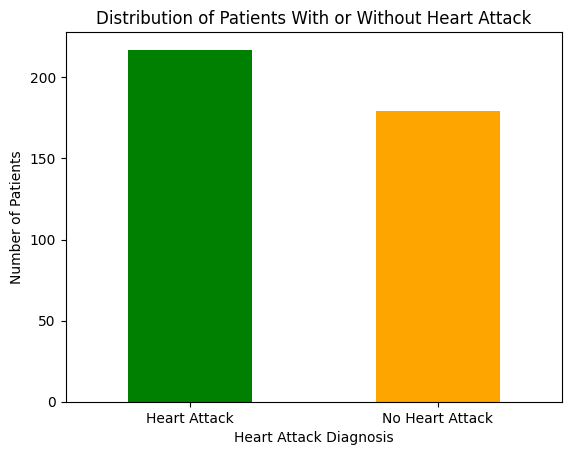

In [51]:
heart_attack_distribution = data['heart_disease_diagnosis'].value_counts()

print(heart_attack_distribution)

heart_attack_distribution.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Heart Attack Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients With or Without Heart Attack')
plt.xticks(ticks=[0, 1], labels=['Heart Attack', 'No Heart Attack'], rotation=0)
plt.show()


***ANALYSIS*** : More than half of the patients in the dataset had a heart attack. However, the dataset is somehow balanced between patient who had a heart attack and those who had not.


## 2. Age-based analysis

What is the average age of patients having heart attacks?

In [53]:
high_risk_patients = data[data['heart_disease_diagnosis'] == True]

avg_age_high_risk = high_risk_patients['age'].mean()

print(f'Average age of high-risk patients: {avg_age_high_risk}')


Average age of high-risk patients: 57.94930875576037


Show the average in both genders?

In [54]:
high_risk_patients = data[data['heart_disease_diagnosis'] == True]

avg_age_high_risk_male = high_risk_patients[high_risk_patients['gender'] == 'Male']['age'].mean()
avg_age_high_risk_female = high_risk_patients[high_risk_patients['gender'] == 'Female']['age'].mean()

print(f'Average age of high-risk male patients: {avg_age_high_risk_male}')
print(f'Average age of high-risk female patients: {avg_age_high_risk_female}')


Average age of high-risk male patients: 57.84615384615385
Average age of high-risk female patients: 58.86363636363637


***ANALYSIS*** : In the dataset used, the average age of patients having heart attacks in both genders is between 57-58 years old.

## 3. Heart attacks analysis by gender and age brackets


<ipython-input-55-5ed2b6b9da55>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_distribution = high_risk_patients.groupby(['gender', 'age_group']).size().unstack(fill_value=0)


age_group  <40  40-50  50-60  60-70  70-80  >80
gender                                         
Female       0      1      8     13      0    0
Male         5     25     80     72     13    0


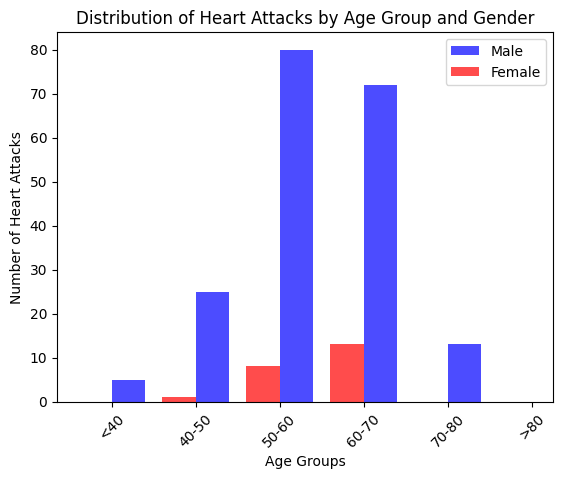

In [55]:

# Define age groups
bins = [0, 40, 50, 60, 70, 80, float('inf')]
labels = ['<40', '40-50', '50-60', '60-70', '70-80', '>80']

# Add a new column for age groups
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Filter high-risk patients (those diagnosed with heart disease)
high_risk_patients = data[data['heart_disease_diagnosis'] == True]

# Group by gender and age group and count the occurrences
heart_attack_distribution = high_risk_patients.groupby(['gender', 'age_group']).size().unstack(fill_value=0)

# Print the distribution table
print(heart_attack_distribution)

# Optional: Visualize the distribution using a bar chart
import matplotlib.pyplot as plt

# Plot distribution for males
heart_attack_distribution.loc['Male'].plot(kind='bar', color='blue', alpha=0.7, label='Male', position=0, width=0.4)

# Plot distribution for females
heart_attack_distribution.loc['Female'].plot(kind='bar', color='red', alpha=0.7, label='Female', position=1, width=0.4)

plt.xlabel('Age Groups')
plt.ylabel('Number of Heart Attacks')
plt.title('Distribution of Heart Attacks by Age Group and Gender')
plt.legend()
plt.xticks(rotation=45)
plt.show()


gender
Male      195
Female     22
Name: count, dtype: int64


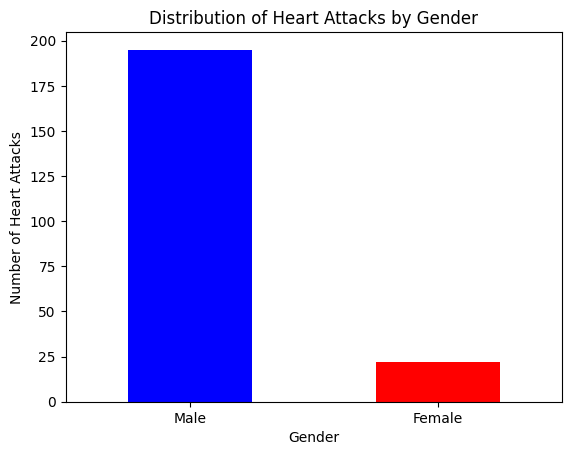

In [44]:

# Filter high-risk patients (those diagnosed with heart disease)
high_risk_patients = data[data['heart_disease_diagnosis'] == True]

# Group by gender and count the occurrences of heart attacks in each gender
heart_attack_distribution_by_gender = high_risk_patients['gender'].value_counts()

# Print the distribution
print(heart_attack_distribution_by_gender)

# Optional: Visualize the distribution using a bar chart
import matplotlib.pyplot as plt

# Bar plot for heart attack distribution by gender
heart_attack_distribution_by_gender.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Heart Attacks')
plt.title('Distribution of Heart Attacks by Gender')
plt.xticks(rotation=0)
plt.show()


***ANALYSIS*** : Most of the patients having heart attacks are males (almost 90%). Most of the patients having heart attacks are having them between age of 50-60 for males, but a bit later for females (60-70 years old). These findings are consistent with the known high risk of ischaemic heart disease in middle age men reported in the literature ()